In [19]:
!pip install qiskit
!pip install qiskit_aer

In [20]:
# Deutsch–Jozsa Algorithm using Qiskit 2.x
# Compatible with Qiskit >= 2.0.0

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [21]:
# ---------- ORACLES ----------
def oracle_constant(qc, ancilla, value=0):
    """Constant oracle: f(x)=0 or f(x)=1"""
    if value == 1:
        qc.x(ancilla)


def oracle_balanced_parity(qc, inputs, ancilla):
    """Balanced oracle: f(x) = x0 XOR x1 XOR ... XOR xn"""
    for q in inputs:
        qc.cx(q, ancilla)




In [22]:
# ---------- DEUTSCH–JOZSA CIRCUIT ----------
def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    """
    n: number of input qubits
    oracle_func: oracle function to modify the circuit
    oracle_args: extra arguments for oracle
    """
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    # Step 1: Initialize |0...0>|1>
    qc.x(ancilla)

    # Step 2: Apply Hadamard to all qubits
    qc.h(qreg)

    # Step 3: Oracle
    oracle_func(qc, *oracle_args)

    # Step 4: Apply Hadamard to input qubits
    for q in inputs:
        qc.h(q)

    # Step 5: Measure only input qubits
    qc.measure(inputs, creg)

    return qc


In [23]:
# ---------- EXECUTION ----------
def run_dj(qc):
    """Run Deutsch–Jozsa circuit on AerSimulator"""
    simulator = AerSimulator()
    tqc = transpile(qc, simulator)
    job = simulator.run(tqc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    print("Measurement counts:", counts)
    plot_histogram(counts)
    plt.show()

    n = qc.num_clbits
    if counts.get("0" * n, 0) == 1024:
        print("✅ Function is CONSTANT")
    else:
        print("✅ Function is BALANCED")


In [24]:
# ---------- MAIN ----------
if __name__ == "__main__":
    n = 3  # number of input qubits

    print("\n=== Constant Oracle (f(x)=0) ===")
    qc_const = deutsch_jozsa_circuit(
        n, oracle_constant, n, 0
    )
    print(qc_const.draw(fold=-1))
    run_dj(qc_const)

    print("\n=== Balanced Oracle (Parity) ===")
    qc_balanced = deutsch_jozsa_circuit(
        n, oracle_balanced_parity, list(range(n)), n
    )
    print(qc_balanced.draw(fold=-1))
    run_dj(qc_balanced)



=== Constant Oracle (f(x)=0) ===
     ┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ H ├┤M├──────
     ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ H ├─╫─┤M├───
     ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─╫──╫──╫─
     └───┘└───┘ ║  ║  ║ 
c: 3/═══════════╩══╩══╩═
                0  1  2 
Measurement counts: {'000': 1024}
✅ Function is CONSTANT

=== Balanced Oracle (Parity) ===
     ┌───┐          ┌───┐     ┌─┐           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 3/══════════════════════════╩═══════╩══╩═
                               0       1  2 
Measurement counts: {'111': 1024}
✅ Function is BALANCED


Measurement counts on input register: {'100': 1024}


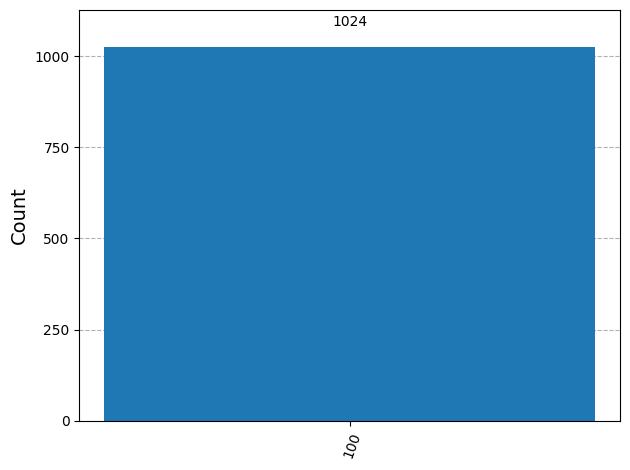

→ Algorithm verdict: FUNCTION APPEARS BALANCED (expected).

Circuit diagram (text):
     ┌───┐┌───┐     ┌───┐          ┌───┐          ┌───┐          ┌───┐     ┌─┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├───────■──┤ X ├───────■──┤ X ├───────■──┤ H ├─────┤M├»
     ├───┤├───┤  │  ├───┤┌───┐  │  ├───┤       │  └───┘       │  ├───┤     └╥┘»
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├───────■──────────────■──┤ H ├──────╫─»
     ├───┤├───┤  │  ├───┤├───┤  │  ├───┤┌───┐  │  ┌───┐┌───┐  │  ├───┤┌───┐ ║ »
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ H ├─╫─»
     ├───┤├───┤┌─┴─┐└───┘└───┘┌─┴─┐└───┘└───┘┌─┴─┐└───┘└───┘┌─┴─┐└───┘└───┘ ║ »
q_3: ┤ X ├┤ H ├┤ X ├──────────┤ X ├──────────┤ X ├──────────┤ X ├───────────╫─»
     └───┘└───┘└───┘          └───┘          └───┘          └───┘           ║ »
c: 3/═══════════════════════════════════════════════════════════════════════╩═»
                                                                            0 »
«           
«q_0: ──────
«     ┌─┐ 

In [25]:
# TASK 1: Create a balanced oracle (flips ancilla for half of inputs) + Deutsch-Jozsa demo
%matplotlib inline

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

def build_balanced_oracle(qc, n, flip_inputs):
    """
    Modify `qc` (QuantumCircuit with n input qubits indexed 0..n-1 and target at index n)
    so that for each x in flip_inputs (an integer 0..2^n-1) the oracle performs:
        |x>|y> -> |x>|y XOR 1>
    flip_inputs must contain exactly half (2^(n-1)) of all possible inputs for a balanced function.
    """
    target = n
    for x in flip_inputs:
        bits = [(x >> i) & 1 for i in range(n)]
        # Flip those input qubits that are 0, to make control on |1> for desired basis state
        for i, b in enumerate(bits):
            if b == 0:
                qc.x(i)
        # Now apply multi-controlled X with all input qubits as controls
        if n == 1:
            qc.cx(0, target)
        elif n == 2:
            # Toffoli (CCX) for 2 controls
            qc.ccx(0, 1, target)
        else:
            # Use mcx for >2 controls (most Qiskit versions provide mcx)
            try:
                controls = list(range(n))
                qc.mcx(controls, target)
            except Exception as e:
                raise RuntimeError(
                    "Multi-controlled X (mcx) failed. Upgrade qiskit or implement decomposition. "
                    f"Original error: {e}"
                )
        # undo the initial flips on inputs
        for i, b in enumerate(bits):
            if b == 0:
                qc.x(i)

def deutsch_josza_with_oracle(n, flip_inputs):
    """
    Build and run Deutsch-Jozsa for n input qubits using a provided balanced oracle described by flip_inputs.
    Returns the measurement counts (input register).
    """
    # Validate flip_inputs length
    if len(flip_inputs) != 2**(n-1):
        raise ValueError(f"flip_inputs must contain exactly 2^(n-1) = {2**(n-1)} items for a balanced oracle.")
    # construct circuit: n inputs + 1 target, and classical register of n bits for measurement
    qc = QuantumCircuit(n+1, n)
    target = n

    # prepare target ancilla in |1> and put it into superposition
    qc.x(target)
    qc.h(target)

    # put inputs into uniform superposition
    qc.h(list(range(n)))

    # build the oracle in-place
    build_balanced_oracle(qc, n, flip_inputs)

    # Hadamard on inputs again
    qc.h(list(range(n)))

    # measure inputs
    qc.measure(list(range(n)), list(range(n)))

    # simulate
    sim = AerSimulator()
    job = sim.run(transpile(qc, sim), shots=1024)
    result = job.result()
    counts = result.get_counts()

    return qc, counts

# ---------------------------
# Example usage for n=3:
# Choose half of the 8 inputs (0..7). Here we flip ancilla for inputs 0,1,2,3 (first half).
n = 3
flip_inputs_example = [0,1,2,3]  # exactly 2^(3-1) = 4 inputs -> balanced

qc_demo, counts_demo = deutsch_josza_with_oracle(n, flip_inputs_example)

print("Measurement counts on input register:", counts_demo)
display(plot_histogram(counts_demo))

# Interpret result:
# For Deutsch-Jozsa: if measurement result is all zeros -> function is constant; otherwise balanced.
most_freq = max(counts_demo, key=counts_demo.get)
if most_freq == '0'*n:
    print("→ Algorithm verdict: FUNCTION APPEARS CONSTANT (unexpected for a balanced oracle).")
else:
    print("→ Algorithm verdict: FUNCTION APPEARS BALANCED (expected).")

# Optional: show the circuit (text) to inspect the oracle structure
print("\nCircuit diagram (text):")
print(qc_demo.draw(output='text'))



=== Deutsch–Jozsa with 2 input qubits ===


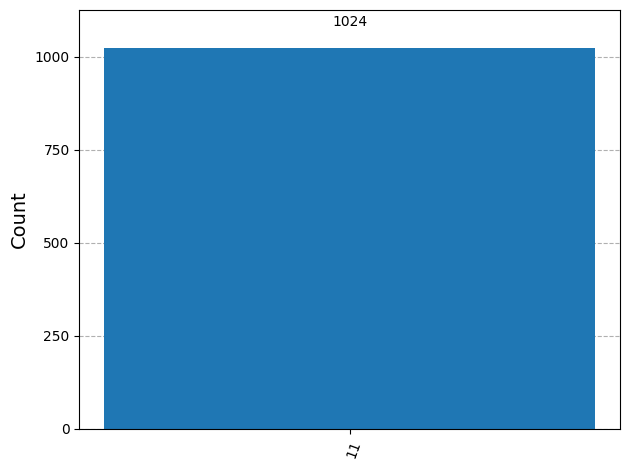

Circuit depth: 6
Most frequent result: 11

=== Deutsch–Jozsa with 4 input qubits ===


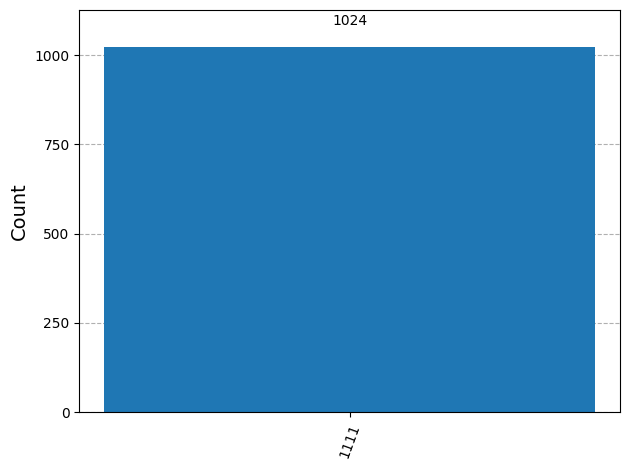

Circuit depth: 8
Most frequent result: 1111

=== Deutsch–Jozsa with 5 input qubits ===


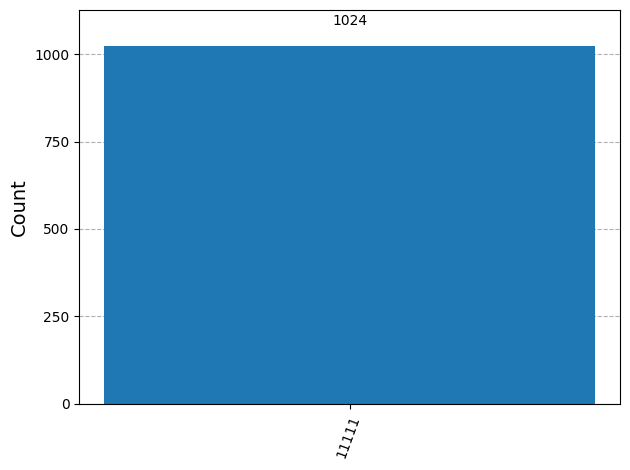

Circuit depth: 9
Most frequent result: 11111


In [26]:
# TASK 2 — Deutsch–Jozsa for various n (2, 4, 5)

%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

def deutsch_jozsa_constant(n):
    qc = QuantumCircuit(n+1, n)
    qc.x(n); qc.h(range(n+1))          # prepare |0...0>|1>
    # constant oracle f(x)=0 → do nothing
    qc.h(range(n)); qc.measure(range(n), range(n))
    return qc

def deutsch_jozsa_balanced(n):
    qc = QuantumCircuit(n+1, n)
    qc.x(n); qc.h(range(n+1))
    # balanced oracle f(x)=parity(x) using CX chain
    for i in range(n):
        qc.cx(i, n)
    qc.h(range(n)); qc.measure(range(n), range(n))
    return qc

sim = AerSimulator()
for n in [2, 4, 5]:
    print(f"\n=== Deutsch–Jozsa with {n} input qubits ===")
    qc_bal = deutsch_jozsa_balanced(n)
    result = sim.run(transpile(qc_bal, sim), shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts))
    print("Circuit depth:", qc_bal.depth())
    print("Most frequent result:", max(counts, key=counts.get))


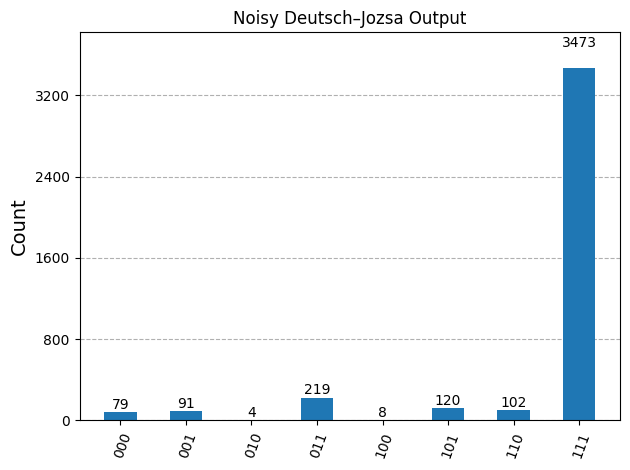

Most probable result (noisy): 111


In [27]:
# TASK 3 — Noise Simulation
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_aer.noise.errors import thermal_relaxation_error

# Simple noise model: small depolarizing + thermal errors
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.02, 1), ['u1','u2','u3'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 2), ['cx'])

n = 3
qc_noisy = deutsch_jozsa_balanced(n)

sim_noisy = AerSimulator(noise_model=noise_model)
result_noisy = sim_noisy.run(transpile(qc_noisy, sim_noisy), shots=4096).result()
counts_noisy = result_noisy.get_counts()
display(plot_histogram(counts_noisy, title="Noisy Deutsch–Jozsa Output"))

print("Most probable result (noisy):", max(counts_noisy, key=counts_noisy.get))


qiskit_ibm_runtime not found — installing qiskit-ibm-runtime now (this may take a minute)...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.4 MB/s eta 0:00:00
Failed to import qiskit_ibm_runtime after installation. Will fall back to AerSimulator.
IBM runtime unavailable in this environment. Falling back to AerSimulator.
Running on local AerSimulator...


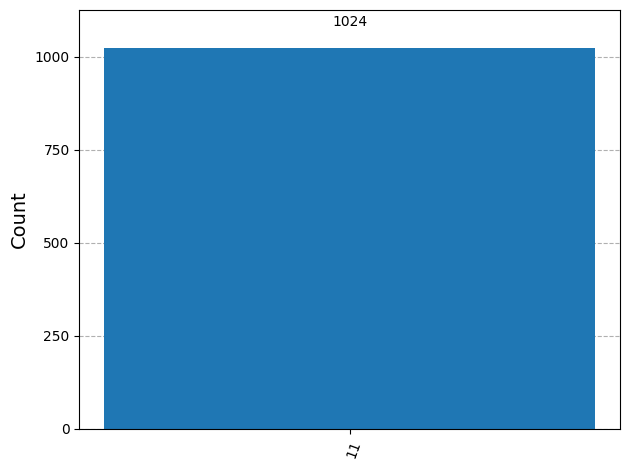

{'11': 1024}


In [29]:
# TASK 4 — Safe, robust cell for Google Colab / local that auto-installs ibm runtime if missing
%matplotlib inline

import os, time
from IPython.display import display
import matplotlib.pyplot as plt

# Example Deutsch-Jozsa circuit builder (n=2 balanced parity)
from qiskit import QuantumCircuit, transpile
def build_example_dj(n=2):
    qc = QuantumCircuit(n+1, n)
    # prepare ancilla in |1> then H it
    qc.x(n); qc.h(n)
    # H on inputs
    qc.h(range(n))
    # simple balanced oracle: parity -> chain of CXs to ancilla
    for i in range(n):
        qc.cx(i, n)
    # H on inputs
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

qc = build_example_dj(n=2)

# Try import of qiskit_ibm_runtime; if missing, install it
try:
    from qiskit_ibm_runtime import QiskitRuntimeService
    from qiskit_ibm_runtime import Options
    from qiskit_ibm_runtime.exceptions import IBMNotAuthorizedError, ApiError
    print("qiskit_ibm_runtime already installed.")
except Exception as ex:
    print("qiskit_ibm_runtime not found — installing qiskit-ibm-runtime now (this may take a minute)...")
    !pip install -q qiskit-ibm-runtime
    # After install, attempt import again
    try:
        from qiskit_ibm_runtime import QiskitRuntimeService
        from qiskit_ibm_runtime import Options
        from qiskit_ibm_runtime.exceptions import IBMNotAuthorizedError, ApiError
        print("Installed and imported qiskit_ibm_runtime successfully.")
    except Exception as ex2:
        print("Failed to import qiskit_ibm_runtime after installation. Will fall back to AerSimulator.")
        # continue — fallback will be used below
        QiskitRuntimeService = None

# Also import Aer simulator and visualization
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# --- Provide your IBM token here if you want to run on real hardware. Otherwise leave None to use simulator ---
# You can also save account previously via QiskitRuntimeService.save_account(...) and then omit the token.
IBM_TOKEN = None  # <-- replace None with "YOUR_IBM_TOKEN_HERE" if you want to run on IBM hardware

use_ibm = False
service = None
backend = None

if 'QiskitRuntimeService' in globals() and QiskitRuntimeService is not None:
    try:
        if IBM_TOKEN:
            # Try to create service using token (temporary)
            service = QiskitRuntimeService(channel="ibm_quantum", token=IBM_TOKEN)
        else:
            # Try to create service using saved account (if any)
            service = QiskitRuntimeService(channel="ibm_quantum")
        # If service created, try to find an operational real backend
        backends = service.backends()
        real_backends = [b for b in backends if (not b.configuration().simulator) and b.status().operational]
        if real_backends:
            # pick a backend with smallest pending jobs if possible
            try:
                real_backends.sort(key=lambda b: b.status().pending_jobs if hasattr(b.status(), "pending_jobs") else 0)
            except Exception:
                pass
            backend = real_backends[0]
            print(f"Selected real IBM backend: {backend.name}")
            use_ibm = True
        else:
            print("No operational real IBM backend found (or access not permitted). Will use AerSimulator.")
            use_ibm = False
    except IBMNotAuthorizedError as e:
        print("IBM authorization failed (invalid token or not saved). Falling back to AerSimulator.")
        use_ibm = False
    except Exception as e:
        print("Could not initialize QiskitRuntimeService (network, permissions, or package issue). Falling back to AerSimulator.")
        print("Detail:", e)
        use_ibm = False
else:
    print("IBM runtime unavailable in this environment. Falling back to AerSimulator.")

# --- Run on IBM backend if available, else use Aer ---
if use_ibm and backend is not None:
    # Transpile for backend and run using the backend.run interface
    print("Transpiling circuit for IBM backend and submitting job...")
    tqc = transpile(qc, backend)
    try:
        job = backend.run(tqc, shots=1024)
        print("Job submitted. Polling status...")
        while job.status().name not in ("DONE", "ERROR", "CANCELLED"):
            print("Job status:", job.status().name, " — waiting 5s...")
            time.sleep(5)
        if job.status().name == "DONE":
            result = job.result()
            counts = result.get_counts()
            print("Job complete on IBM backend. Counts:")
            display(plot_histogram(counts))
            print(counts)
        else:
            print("Job ended with status:", job.status())
            try:
                print("Job error message:", job.error_message())
            except Exception:
                pass
    except Exception as e:
        print("Error while running job on IBM backend — falling back to AerSimulator. Error:", e)
        simulator = AerSimulator()
        tqc = transpile(qc, simulator)
        result = simulator.run(tqc, shots=1024).result()
        counts = result.get_counts()
        print("Simulator counts:")
        display(plot_histogram(counts))
        print(counts)
else:
    print("Running on local AerSimulator...")
    simulator = AerSimulator()
    tqc = transpile(qc, simulator)
    result = simulator.run(tqc, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts))
    print(counts)


In [30]:
# TASK 5 — Oracle analysis

from qiskit.quantum_info import Operator

n = 2
qc_oracle = QuantumCircuit(n+1)
# Example: balanced oracle f(x)=x XOR 1
qc_oracle.cx(0, n)
qc_oracle.x(n)

# Print gate definition
print("Oracle gate decomposition:")
print(qc_oracle.to_gate().definition)

# Print full unitary matrix
U = Operator(qc_oracle)
print("\nUnitary matrix representation:\n", np.round(U.data, 2))


Oracle gate decomposition:
               
q_0: ──■───────
       │       
q_1: ──┼───────
     ┌─┴─┐┌───┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘

Unitary matrix representation:
 [[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
